In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
car_data = pd.read_csv('Car_sales_details_p3.csv',na_values=['Missing','n/a','N/A','NA',""])
sales_reg = pd.read_csv('State_region_mapping_p3.csv',na_values=['Missing','n/a','N/A','NA',""])
status = pd.read_csv('sales_Status_p3.csv',na_values=['Missing','n/a','N/A','NA',""])

In [3]:
merger1=pd.merge(car_data,status,on='Sales_ID',how='inner')
car_dataset = pd.merge(merger1,sales_reg,on='State or Province',how='inner')

In [4]:
car_dataset.rename(columns={'State or Province':'state_or_province'},inplace=True)

In [5]:
car =car_dataset.copy()

# EDA

In [6]:
car['km_driven'].describe()

count    7.906000e+03
mean     6.918866e+04
std      5.679230e+04
min      1.000000e+00
25%      3.500000e+04
50%      6.000000e+04
75%      9.542500e+04
max      2.360457e+06
Name: km_driven, dtype: float64

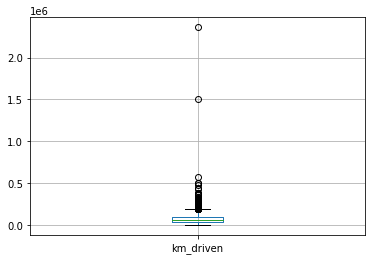

In [7]:
car.boxplot(column='km_driven')
plt.show()

In [8]:
car['km_driven'].quantile(np.arange(0.0,0.1,0.01))

0.00        1.0
0.01     4000.0
0.02     5000.0
0.03     6550.0
0.04     7500.0
0.05     9000.0
0.06    10000.0
0.07    10000.0
0.08    13000.0
0.09    15000.0
Name: km_driven, dtype: float64

In [9]:
q=car['km_driven'].quantile(0.0)

In [10]:
car[car.km_driven<=q]

,Sales_ID,name,year,selling_price,km_driven,state_or_province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,Region
7434,7914,Maruti Eeco 5 STR With AC Plus HTR CNG,2011,209000,1,Indiana,Indianapolis,CNG,Individual,Manual,Fourth & Above Owner,15.1 km/kg,1196 CC,73 bhp,5,N,Central


In [11]:
car.loc[(car["km_driven"]<=q), 'km_driven'] = car['km_driven'].mean()

In [12]:
car['km_driven'].describe()

count    7.906000e+03
mean     6.919741e+04
std      5.678696e+04
min      1.000000e+03
25%      3.500000e+04
50%      6.000000e+04
75%      9.542500e+04
max      2.360457e+06
Name: km_driven, dtype: float64

In [13]:
car['km_driven'].quantile(np.arange(0.8,1,0.01))

0.80    103000.0
0.81    110000.0
0.82    110000.0
0.83    110000.0
0.84    110000.0
0.85    116550.0
0.86    120000.0
0.87    120000.0
0.88    120000.0
0.89    120000.0
0.90    120000.0
0.91    120000.0
0.92    125000.0
0.93    135000.0
0.94    140000.0
0.95    150000.0
0.96    160000.0
0.97    175000.0
0.98    196800.0
0.99    225000.0
Name: km_driven, dtype: float64

In [14]:
q1=car['km_driven'].quantile(0.99)
car[car.km_driven>q1]

,Sales_ID,name,year,selling_price,km_driven,state_or_province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,Region
132,402,Tata Indigo LS,2012,95000,265000.0,New York,New York City,Diesel,Individual,Manual,Second Owner,17.0 kmpl,1405 CC,70 bhp,5,Y,East
280,1238,Mahindra Xylo D4 BSIII,2013,200000,300000.0,New York,Troy,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,8,Y,East
448,5213,Ford Figo Diesel Celebration Edition,2013,229999,230000.0,New York,Watertown,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5,N,East
495,5872,Mahindra Scorpio LX,2012,450000,370000.0,New York,Plainview,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,120 bhp,9,N,East
682,1811,Mahindra XUV500 W6 2WD,2012,500000,1500000.0,Illinois,West Chicago,Diesel,Individual,Manual,First Owner,15.1 kmpl,2179 CC,140 bhp,7,Y,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7638,2095,Mahindra Xylo D2,2010,160000,255000.0,North Dakota,Dickinson,Diesel,Individual,Manual,Second Owner,13.0 kmpl,2489 CC,95 bhp,8,N,Central
7754,2580,Maruti Wagon R Duo Lxi,2011,300000,300000.0,Wyoming,Rock Springs,LPG,Individual,Manual,First Owner,26.2 km/kg,998 CC,58.2 bhp,5,N,West
7755,2585,Hyundai Verna 1.4 CRDi,2015,525000,248000.0,Wyoming,Rock Springs,Diesel,Individual,Manual,First Owner,24.8 kmpl,1396 CC,88.7 bhp,5,N,West
7804,7970,Toyota Innova 2.5 G (Diesel) 7 Seater,2012,730000,250000.0,Nevada,Reno,Diesel,Individual,Manual,First Owner,12.99 kmpl,2494 CC,100 bhp,7,N,West


We see that some values were too high we need to check them

In [15]:
car['km_driven'].quantile(np.arange(0.99,1,0.001))

0.990     225000.00
0.991     231229.49
0.992     247520.00
0.993     250000.00
0.994     250000.00
0.995     264475.00
0.996     281900.00
0.997     300000.00
0.998     321900.00
0.999     384370.00
1.000    2360457.00
Name: km_driven, dtype: float64

In [16]:
q2=car['km_driven'].quantile(0.999)

In [17]:
car[car.km_driven>q2]

,Sales_ID,name,year,selling_price,km_driven,state_or_province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,Region
682,1811,Mahindra XUV500 W6 2WD,2012,500000,1500000.0,Illinois,West Chicago,Diesel,Individual,Manual,First Owner,15.1 kmpl,2179 CC,140 bhp,7,Y,Central
3928,5190,Toyota Innova 2.5 VX (Diesel) 7 Seater,2013,750000,440000.0,Pennsylvania,Altoona,Diesel,Individual,Manual,Second Owner,12.99 kmpl,2494 CC,100.6 bhp,7,N,East
4734,5107,Mahindra Scorpio M2DI,2011,400000,475000.0,Maryland,Middle River,Diesel,Individual,Manual,Third Owner,13.5 kmpl,2179 CC,115 bhp,5,N,East
5538,3509,Maruti Wagon R LXI Minor,2010,194000,577414.0,Tennessee,Columbia,Petrol,Individual,Manual,Second Owner,18.9 kmpl,1061 CC,67 bhp,5,N,South
6057,6674,Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII,2011,350000,500000.0,Idaho,Post Falls,Diesel,Individual,Manual,Second Owner,12.99 kmpl,2494 CC,100.57 bhp,7,N,West
6646,5468,Toyota Innova 2.5 VX (Diesel) 7 Seater BS IV,2010,950000,426000.0,Kansas,Emporia,Diesel,Individual,Manual,First Owner,12.8 kmpl,2494 CC,102 bhp,7,N,Central
7126,3642,Maruti Wagon R VXI BS IV,2011,229999,500000.0,Colorado,Denver,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5,N,West
7822,3487,Hyundai i20 Asta 1.2,2007,550000,2360457.0,Mississippi,Clinton,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,5,N,South


We see that km_driven above 99 quantile are continuous in range except 2 cars with sales id 682 and 7822.But car which has km_driven value 15,00,000 is sold.So it is not an outlier and we have to replace car with km_driven 23,60,457 with mean value.

In [18]:
car.loc[(car["km_driven"]>1500000), 'km_driven'] = car['km_driven'].mean()

In [19]:
car['km_driven'].describe()

count    7.906000e+03
mean     6.890760e+04
std      5.060193e+04
min      1.000000e+03
25%      3.500000e+04
50%      6.000000e+04
75%      9.515000e+04
max      1.500000e+06
Name: km_driven, dtype: float64

We can see that max value got changed which shows that outliers are treated in km_driven column

In [20]:
car['mileage']=car['mileage'].apply(lambda x : x.split(' '))
car['mileage']=car['mileage'].apply(lambda x: x[0])
car['mileage']=car['mileage'].astype('float64')
car['mileage'].head()

0    23.40
1    17.00
2    18.16
3    22.00
4    25.10
Name: mileage, dtype: float64

In [21]:
car['engine']= car['engine'].apply(lambda x : x.split(' '))
car['engine']=car['engine'].apply(lambda x: x[0])
car['engine']=car['engine'].astype('int64')

car['max_power']= car['max_power'].apply(lambda x : x.split(' '))
car['max_power']=car['max_power'].apply(lambda x: x[0])
car['max_power']=car['max_power'].astype('float64')

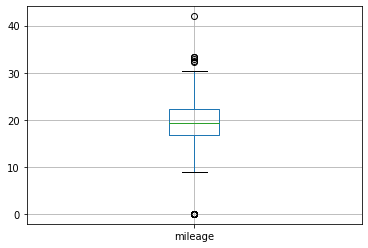

In [22]:
car.boxplot(column='mileage')
plt.show()

In [23]:
car['mileage'].quantile(0.0)

0.0

In [24]:
car.loc[(car['mileage']<0.1)]

,Sales_ID,name,year,selling_price,km_driven,state_or_province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,Region
183,645,Tata Indica Vista Aura Safire Anniversary Edition,2009,135000,28900.0,New York,New York City,Petrol,Individual,Manual,Second Owner,0.0,1172,65.00,5,Y,East
211,786,Hyundai Santro Xing GL,2009,120000,90000.0,New York,New York City,Petrol,Individual,Manual,Second Owner,0.0,1086,62.00,5,Y,East
320,1650,Hyundai Santro Xing GL,2008,105000,128000.0,New York,North Babylon,Petrol,Individual,Manual,First Owner,0.0,1086,62.00,5,Y,East
756,2726,Hyundai Santro Xing (Non-AC),2013,184000,15000.0,Illinois,Elk Grove Village,Petrol,Individual,Manual,First Owner,0.0,1086,62.10,5,N,Central
966,5901,Mahindra Bolero Pik-Up FB 1.7T,2020,679000,5000.0,Illinois,Forest Park,Diesel,Individual,Manual,First Owner,0.0,2523,70.00,2,N,Central
1627,4528,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000.0,California,Stockton,Diesel,Individual,Automatic,Third Owner,0.0,2987,165.00,5,N,West
1721,5277,Hyundai Santro Xing GL,2008,175000,40000.0,California,Temecula,Petrol,Individual,Manual,First Owner,0.0,1086,62.00,5,N,West
2095,2138,Land Rover Freelander 2 TD4 HSE,2013,1650000,64788.0,Texas,Victoria,Diesel,Dealer,Automatic,First Owner,0.0,2179,115.00,5,N,Central
3310,6535,Hyundai Santro Xing GL,2010,150000,110000.0,North Carolina,Concord,Petrol,Individual,Manual,First Owner,0.0,1086,62.00,5,N,South
3682,6630,Mahindra Bolero Pik-Up CBC 1.7T,2019,722000,80000.0,Florida,Bradenton,Diesel,Individual,Manual,First Owner,0.0,2523,70.00,2,N,South


We see that cars were sold even with average mileage of 0.0 kmpl. So we have to treat them with average mileage.

In [25]:
car['mileage'].describe()

count    7906.000000
mean       19.419861
std         4.036263
min         0.000000
25%        16.780000
50%        19.300000
75%        22.320000
max        42.000000
Name: mileage, dtype: float64

In [26]:
car.loc[(car["mileage"]<0.1), 'mileage'] = car['mileage'].mean()

In [27]:
car['mileage'].describe()

count    7906.000000
mean       19.461619
std         3.934291
min         9.000000
25%        16.780000
50%        19.330000
75%        22.320000
max        42.000000
Name: mileage, dtype: float64

In [28]:
car['mileage'].quantile(0.1)

13.93

In [29]:
car.loc[(car["mileage"]<13.93)]

,Sales_ID,name,year,selling_price,km_driven,state_or_province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,Region
14,150,BMW 5 Series 523i,2010,975000,72200.0,District of Columbia,Washington,Petrol,Dealer,Automatic,Second Owner,10.80,2497,150.0,5,Y,East
27,288,Mahindra Bolero DI DX 7 Seater,2007,210000,207890.0,District of Columbia,Washington,Diesel,Individual,Manual,Second Owner,13.60,2523,63.0,7,Y,East
29,319,Toyota Innova 2.5 GX (Diesel) 8 Seater,2013,800000,160000.0,District of Columbia,Washington,Diesel,Individual,Manual,Second Owner,12.99,2494,100.6,8,Y,East
51,895,Mahindra Bolero SLX,2010,421000,120000.0,District of Columbia,Washington,Diesel,Individual,Manual,Second Owner,13.60,2523,63.0,7,Y,East
62,990,Chevrolet Tavera Neo 3 LT 9 Seats BSIII,2013,600000,90000.0,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,13.58,2499,72.4,9,Y,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7866,7932,Ford Endeavour 2.2 Titanium AT 4X2,2016,2100000,85000.0,Mississippi,Long Beach,Diesel,Individual,Automatic,Second Owner,12.62,2198,158.0,7,N,South
7873,3517,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2711000,9000.0,Delaware,Newark,Diesel,Dealer,Automatic,First Owner,13.60,1999,177.0,5,N,East
7876,4207,Chevrolet Captiva LT,2011,500000,99500.0,Delaware,Dover,Diesel,Individual,Manual,Third Owner,11.50,1991,147.9,7,N,East
7882,4213,Hyundai Verna 1.6 Xi ABS,2008,114999,55000.0,Delaware,Dover,Petrol,Individual,Manual,Second Owner,13.90,1599,103.2,5,N,East


In [30]:
car['mileage'].quantile(np.arange(0.6,0.8,0.02))

0.60    20.45
0.62    20.54
0.64    20.86
0.66    21.10
0.68    21.19
0.70    21.50
0.72    21.90
0.74    22.10
0.76    22.50
0.78    22.74
0.80    22.95
Name: mileage, dtype: float64

In [31]:
car['mileage'].quantile(np.arange(0.8,1,0.02))

0.80    22.950
0.82    23.100
0.84    23.590
0.86    23.950
0.88    24.300
0.90    24.700
0.92    25.170
0.94    25.470
0.96    26.282
0.98    27.390
Name: mileage, dtype: float64

In [32]:
car['mileage'].quantile(0.99)

28.4

In [33]:
car['mileage'].quantile(np.arange(0.99,1,0.001))

0.990    28.40
0.991    28.40
0.992    28.40
0.993    28.40
0.994    28.40
0.995    28.40
0.996    28.40
0.997    28.40
0.998    28.40
0.999    30.46
1.000    42.00
Name: mileage, dtype: float64

In [34]:
car['mileage'].quantile(0.999)

30.46

In [35]:
car.loc[(car["mileage"]>30.46)]

,Sales_ID,name,year,selling_price,km_driven,state_or_province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,Region
107,171,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000.0,New York,New York City,Petrol,Individual,Automatic,First Owner,42.00,1969,400.00,4,Y,East
957,5816,Maruti Alto 800 LXI CNG,2020,370000,16000.0,Illinois,Freeport,CNG,Individual,Manual,First Owner,33.00,796,47.30,5,N,Central
2642,36,Maruti Alto 800 CNG LXI Optional,2019,330000,10000.0,Washington,Seattle,CNG,Individual,Manual,Second Owner,33.44,796,40.30,4,Y,West
3526,3909,Maruti Alto 800 CNG LXI,2017,260000,67000.0,Florida,Lake Worth,CNG,Individual,Manual,First Owner,33.44,796,40.30,4,N,South
3851,2313,Maruti Wagon R CNG LXI,2013,270000,80000.0,Pennsylvania,Scranton,CNG,Individual,Manual,Second Owner,32.52,998,58.33,5,N,East
4286,7544,Maruti Alto 800 CNG LXI Optional,2019,330000,10000.0,Michigan,Mount Pleasant,CNG,Individual,Manual,Second Owner,33.44,796,40.30,4,N,Central
6207,5790,Maruti Alto K10 LXI CNG,2019,430000,20000.0,Minnesota,Prior Lake,CNG,Individual,Manual,First Owner,32.26,998,58.30,4,N,Central


All the values were in continuous range and car with AvgMileage 42 is sold.So we don't have to treat any outliers.


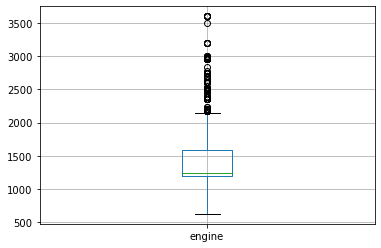

In [36]:
car.boxplot(column='engine')
plt.show()

In [37]:
car['engine'].quantile(np.arange(0.4,1,0.2))

0.4    1248.0
0.6    1399.0
0.8    1968.0
Name: engine, dtype: float64

In [38]:
car['engine'].quantile(np.arange(0.7,1,0.04))

0.70    1498.0
0.74    1582.0
0.78    1598.0
0.82    1995.0
0.86    2179.0
0.90    2198.5
0.94    2494.0
0.98    2609.0
Name: engine, dtype: float64

In [39]:
car['engine'].quantile(np.arange(0.98,1,0.001))

0.980    2609.000
0.981    2695.610
0.982    2755.000
0.983    2755.000
0.984    2755.000
0.985    2755.000
0.986    2953.000
0.987    2956.000
0.988    2956.000
0.989    2956.495
0.990    2967.000
0.991    2982.000
0.992    2982.000
0.993    2982.000
0.994    2982.000
0.995    2987.000
0.996    2993.000
0.997    2993.000
0.998    2997.000
0.999    3198.000
1.000    3604.000
Name: engine, dtype: float64

In [40]:
car.loc[(car["engine"]>3198.000)]

,Sales_ID,name,year,selling_price,km_driven,state_or_province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,Region
335,1861,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000.0,New York,Auburn,Petrol,Individual,Automatic,First Owner,9.50,3604,280.0,5,Y,East
1067,135,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000.0,California,Los Angeles,Petrol,Individual,Automatic,First Owner,9.50,3604,280.0,5,Y,West
3745,7704,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000.0,Florida,Pembroke Pines,Petrol,Individual,Automatic,First Owner,9.50,3604,280.0,5,N,South
4228,5963,Mercedes-Benz E-Class E350 Petrol,2009,1000000,80000.0,Michigan,Lincoln Park,Petrol,Individual,Automatic,Third Owner,10.93,3498,272.0,5,N,Central
5998,1565,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000.0,Idaho,Lewiston,Petrol,Individual,Automatic,First Owner,9.50,3604,280.0,5,Y,West
6015,3240,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000.0,Idaho,Pocatello,Petrol,Individual,Automatic,First Owner,9.50,3604,280.0,5,N,West
7723,5249,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000.0,Louisiana,Bossier City,Petrol,Individual,Automatic,First Owner,9.50,3604,280.0,5,N,South


In [41]:
car['engine'].describe()

count    7906.000000
mean     1458.708829
std       503.893057
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1582.000000
max      3604.000000
Name: engine, dtype: float64

There were no outliers present in EngineCC column

In [42]:
car['max_power'].describe()

count    7906.000000
mean       91.587374
std        35.747216
min        32.800000
25%        68.050000
50%        82.000000
75%       102.000000
max       400.000000
Name: max_power, dtype: float64

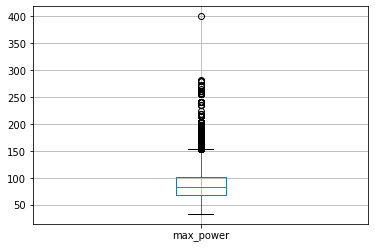

In [43]:
car.boxplot(column='max_power')
plt.show()

In [44]:
car['max_power'].quantile(np.arange(0.1,1,0.1))

0.1     60.00
0.2     67.05
0.3     73.00
0.4     75.00
0.5     82.00
0.6     88.70
0.7     98.60
0.8    110.00
0.9    140.00
Name: max_power, dtype: float64

In [45]:
car['max_power'].quantile(np.arange(0.8,1,0.02))

0.80    110.000
0.82    117.330
0.84    120.000
0.86    126.200
0.88    138.030
0.90    140.000
0.92    147.940
0.94    167.655
0.96    177.000
0.98    190.000
Name: max_power, dtype: float64

In [46]:
car['max_power'].quantile(np.arange(0.9,1,0.01))

0.90    140.0000
0.91    147.5055
0.92    147.9400
0.93    153.8600
0.94    167.6550
0.95    171.5000
0.96    177.0000
0.97    187.7400
0.98    190.0000
0.99    214.0320
Name: max_power, dtype: float64

In [47]:
car['max_power'].quantile(0.999)

272.7600000000093

In [48]:
car.loc[(car["max_power"]>272.76)]

,Sales_ID,name,year,selling_price,km_driven,state_or_province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,Region
107,171,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000.0,New York,New York City,Petrol,Individual,Automatic,First Owner,42.0,1969,400.0,4,Y,East
335,1861,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000.0,New York,Auburn,Petrol,Individual,Automatic,First Owner,9.5,3604,280.0,5,Y,East
1067,135,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000.0,California,Los Angeles,Petrol,Individual,Automatic,First Owner,9.5,3604,280.0,5,Y,West
1076,149,Mercedes-Benz S-Class S 350 CDI,2017,5850000,47000.0,California,Los Angeles,Diesel,Dealer,Automatic,First Owner,13.5,2987,282.0,5,Y,West
3745,7704,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000.0,Florida,Pembroke Pines,Petrol,Individual,Automatic,First Owner,9.5,3604,280.0,5,N,South
5998,1565,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000.0,Idaho,Lewiston,Petrol,Individual,Automatic,First Owner,9.5,3604,280.0,5,Y,West
6015,3240,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000.0,Idaho,Pocatello,Petrol,Individual,Automatic,First Owner,9.5,3604,280.0,5,N,West
7723,5249,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000.0,Louisiana,Bossier City,Petrol,Individual,Automatic,First Owner,9.5,3604,280.0,5,N,South


We see that car with MaxPower 400 was sold which shows that it was not outlier and it's km_driven is very less,so we don't have to treat it.Remaining values were in continuous range.

In [49]:
car.head()

,Sales_ID,name,year,selling_price,km_driven,state_or_province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,Region
0,1,Maruti Swift Dzire VDI,2014,450000,145500.0,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.40,1248,74.000,5,Y,East
1,38,Hyundai Verna VTVT 1.6 SX Option,2019,1149000,5000.0,District of Columbia,Washington,Petrol,Individual,Manual,First Owner,17.00,1591,121.300,5,Y,East
2,66,Ford Figo 1.2P Titanium MT,2017,600000,25000.0,District of Columbia,Washington,Petrol,Individual,Manual,Third Owner,18.16,1196,86.800,5,Y,East
3,68,Volkswagen Ameo 1.5 TDI Highline 16 Alloy,2016,540000,40000.0,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,22.00,1498,108.495,5,Y,East
4,69,Honda City i DTEC VX,2015,630000,135000.0,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,25.10,1498,98.600,5,Y,East


In [50]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
car['name']=label_encoder.fit_transform(car['name'])
car['state_or_province']=label_encoder.fit_transform(car['state_or_province'])
car['City']=label_encoder.fit_transform(car['City'])
car['fuel']=label_encoder.fit_transform(car['fuel'])
car['seller_type']=label_encoder.fit_transform(car['seller_type'])
car['transmission']=label_encoder.fit_transform(car['transmission'])
car['owner']=label_encoder.fit_transform(car['owner'])
car['sold']=label_encoder.fit_transform(car['sold'])
car['Region']=label_encoder.fit_transform(car['Region'])

In [51]:
car.head()

,Sales_ID,name,year,selling_price,km_driven,state_or_province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,Region
0,1,1249,2014,450000,145500.0,7,1223,1,1,1,0,23.40,1248,74.000,5,1,1
1,38,633,2019,1149000,5000.0,7,1223,3,1,1,0,17.00,1591,121.300,5,1,1
2,66,255,2017,600000,25000.0,7,1223,3,1,1,4,18.16,1196,86.800,5,1,1
3,68,1919,2016,540000,40000.0,7,1223,1,1,1,0,22.00,1498,108.495,5,1,1
4,69,389,2015,630000,135000.0,7,1223,1,1,1,0,25.10,1498,98.600,5,1,1


In [52]:
cr = car.drop('Sales_ID',axis=1)
cr.head()

,name,year,selling_price,km_driven,state_or_province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,Region
0,1249,2014,450000,145500.0,7,1223,1,1,1,0,23.40,1248,74.000,5,1,1
1,633,2019,1149000,5000.0,7,1223,3,1,1,0,17.00,1591,121.300,5,1,1
2,255,2017,600000,25000.0,7,1223,3,1,1,4,18.16,1196,86.800,5,1,1
3,1919,2016,540000,40000.0,7,1223,1,1,1,0,22.00,1498,108.495,5,1,1
4,389,2015,630000,135000.0,7,1223,1,1,1,0,25.10,1498,98.600,5,1,1


In [53]:
x = cr.drop('selling_price',axis=1)
y = cr['selling_price']

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scale = scaler.fit_transform(x)
df_scaled = pd.DataFrame(df_scale,columns=x.columns)
df_scaled.head()

,name,year,km_driven,state_or_province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,Region
0,0.448252,0.004158,1.513722,-1.028573,1.539086,-0.887058,0.277395,0.389408,-0.655358,1.001103,-0.418188,-0.492024,-0.434128,1.71843,-0.348458
1,-0.718453,1.298338,-1.263028,-1.028573,1.539086,1.110117,0.277395,0.389408,-0.655358,-0.625723,0.262555,0.831240,-0.434128,1.71843,-0.348458
2,-1.434386,0.780666,-0.867761,-1.028573,1.539086,1.110117,0.277395,0.389408,2.662242,-0.330860,-0.521391,-0.133931,-0.434128,1.71843,-0.348458
3,1.717234,0.521830,-0.571311,-1.028573,1.539086,-0.887058,0.277395,0.389408,-0.655358,0.645235,0.077980,0.473007,-0.434128,1.71843,-0.348458
4,-1.180590,0.262994,1.306207,-1.028573,1.539086,-0.887058,0.277395,0.389408,-0.655358,1.433229,0.077980,0.196185,-0.434128,1.71843,-0.348458


In [55]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df_scaled,y,test_size=0.2,random_state=123)

In [56]:
test_results_mae = {}
test_results_mse = {}
test_results_r2_score = {}
test_result_score = {}

# OLS Model-- linear Regression

In [57]:
import statsmodels.api as sm

xtrain1 = sm.add_constant(xtrain)
xtest1 = sm.add_constant(xtest)

In [58]:
model1 = sm.OLS(ytrain,xtrain1)

In [59]:
results1 = model1.fit()

In [60]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     913.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:38:06   Log-Likelihood:                -91456.
No. Observations:                6324   AIC:                         1.829e+05
Df Residuals:                    6308   BIC:                         1.831e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.521e+05   5814.48

Removing attributes with pval>0.05 as those will have depenency and the R-squared should not reduce on dletion

In [61]:
xtrain2 = xtrain1.drop('Region', axis=1)
xtest2 = xtest1.drop('Region', axis=1)
model2 = sm.OLS(ytrain,xtrain2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     978.8
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:38:06   Log-Likelihood:                -91456.
No. Observations:                6324   AIC:                         1.829e+05
Df Residuals:                    6309   BIC:                         1.830e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.521e+05   5814.27

In [62]:
xtrain3 = xtrain2.drop('state_or_province', axis=1)
xtest3 = xtest2.drop('state_or_province', axis=1)
model3 = sm.OLS(ytrain,xtrain3)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1054.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:38:06   Log-Likelihood:                -91456.
No. Observations:                6324   AIC:                         1.829e+05
Df Residuals:                    6310   BIC:                         1.830e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.521e+05   5813.995    112.164   

In [63]:
xtrain4 = xtrain3.drop('owner', axis=1)
xtest4 = xtest3.drop('owner', axis=1)
model4 = sm.OLS(ytrain,xtrain4)
results4 = model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1142.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:38:06   Log-Likelihood:                -91457.
No. Observations:                6324   AIC:                         1.829e+05
Df Residuals:                    6311   BIC:                         1.830e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.521e+05   5813.902    112.168   

In [64]:
xtrain5 = xtrain4.drop('City', axis=1)
xtest5 = xtest4.drop('City', axis=1)
model5 = sm.OLS(ytrain,xtrain5)
results5 = model5.fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1246.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:38:06   Log-Likelihood:                -91457.
No. Observations:                6324   AIC:                         1.829e+05
Df Residuals:                    6312   BIC:                         1.830e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.521e+05   5813.914    112.166   

In [65]:
xtrain6 = xtrain5.drop('sold', axis=1)
xtest6 = xtest5.drop('sold', axis=1)
model6 = sm.OLS(ytrain,xtrain6)
results6 = model6.fit()
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1370.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:38:06   Log-Likelihood:                -91458.
No. Observations:                6324   AIC:                         1.829e+05
Df Residuals:                    6313   BIC:                         1.830e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.522e+05   5814.123    112.167   

In [66]:
xtrain7 = xtrain6.drop('name', axis=1)
xtest7 = xtest6.drop('name', axis=1)
model7 = sm.OLS(ytrain,xtrain7)
results7 = model7.fit()
print(results7.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1521.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:38:06   Log-Likelihood:                -91459.
No. Observations:                6324   AIC:                         1.829e+05
Df Residuals:                    6314   BIC:                         1.830e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.522e+05   5814.899    112.152   

As Rsqured reduced on deletion of name it should not be done and the action is reversed. So the final model is model6

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [68]:
predictions = results6.predict(xtest6)

In [69]:
mae0 = mean_absolute_error(ytest,predictions)
mae0

276637.18835386063

In [70]:
mse0 = mean_squared_error(ytest,predictions)
mse0

200933125813.0264

In [71]:
rmse0 = mean_squared_error(ytest,predictions,squared=False)
rmse0

448255.6478317104

In [72]:
r0 = r2_score(ytest,predictions)
r0

0.6668664267591984

In [73]:
test_results_mae['OLS Model']=mae0
test_results_mse['OLS Model']=mse0
test_results_r2_score['OLS Model']=r0
test_result_score['OLS Model']=rmse0

# Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
  
regr.fit(xtrain, ytrain)
pred = regr.predict(xtest)

In [75]:
mae = mean_absolute_error(ytest,pred)
mae

276586.4559983192

In [76]:
mse = mean_squared_error(ytest,pred)
mse

200393664810.82443

In [77]:
r = r2_score(ytest,pred)
r

0.6677608167238218

In [78]:
rmse = mean_squared_error(ytest,pred,squared=False)
rmse

447653.5097715916

In [79]:
import seaborn as sns

Text(0.5, 1.0, 'Actual vs Predicted')

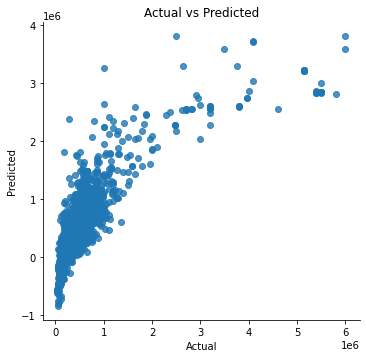

In [80]:
df_results = pd.DataFrame({'Actual':ytest,'Predicted':pred})
df_results['Redisuals'] = abs(df_results['Actual'])-abs(df_results['Predicted'])
sns.lmplot(x='Actual',y='Predicted',data=df_results,fit_reg =False)
plt.title('Actual vs Predicted')

It shows a positive almost linear relationship

In [81]:
regr.score(xtest,ytest)

0.6677608167238218

# Regularisation

Ridge Regression

In [82]:
from sklearn.linear_model import Ridge
ridge_rig =Ridge().fit(xtrain,ytrain)

In [83]:
ridge_rig.coef_

array([ -10076.68792109,  117806.27863148,  -78913.71485747,
         -4762.93403856,   -5691.38965075,  -21237.42947707,
        -83049.22097349, -164305.16728604,   -6327.10421145,
         58516.65868414,   54170.82940195,  459286.83157021,
        -27037.71801551,    6762.42014384,   -4439.9148445 ])

In [84]:
ridge_pred = ridge_rig.predict(xtest)

In [85]:
m_se=mean_squared_error(ytest,ridge_pred,squared=False)
m_se

447644.8406266198

In [86]:
ridge_rig.alpha

1.0

This shows lambda value. We can use crossvalidation to fix a lambda value in random

In [87]:
from sklearn.model_selection import cross_val_score
alpha_space = [0.001,0.1,1.5,10]
ridge_scores = []
for i in alpha_space:
    val = np.mean(cross_val_score(Ridge(alpha=i),xtrain,ytrain,cv=5))
    ridge_scores.append(val)

In [88]:
ridge_scores

[0.6799716544610567, 0.679971863000447, 0.679974753727383, 0.6799900077810241]

Ridge score -- ie.R2-score became max for lambda =10

lasso Regression

In [89]:
from sklearn.linear_model import Lasso
laso_reg = Lasso().fit(xtrain,ytrain)

In [90]:
laso_reg.coef_

array([ -10064.05412845,  117783.71359064,  -78911.46584345,
         -4760.09766959,   -5690.7489789 ,  -21220.69019845,
        -83041.2872707 , -164284.61596247,   -6315.19794502,
         58561.73574918,   54052.70146855,  459472.92782307,
        -26981.55045536,    6762.90780448,   -4438.72996122])

In [91]:
laso_pred = laso_reg.predict(xtest)

In [92]:
rms_e=mean_squared_error(ytest,laso_pred,squared=False)
rms_e

447653.5758201858

In [93]:
laso_reg.alpha

1.0

In [94]:
alpha_space = [0.001,0.1,1.5,10]
laso_scores = []
for i in alpha_space:
    val = np.mean(cross_val_score(Lasso(alpha=i),xtrain,ytrain,cv=5))
    laso_scores.append(val)

In [95]:
laso_scores

[0.6799716524407312,
 0.6799716608415755,
 0.6799717867351486,
 0.6799725387585762]

Elasticnet Regressor

In [96]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet().fit(xtrain,ytrain)
pred = enet.predict(xtest)
rm_se=mean_squared_error(ytest,pred,squared=False)
rm_se

459443.912951284

In [97]:
enet.l1_ratio

0.5

In [98]:
alpha_space = [0.001,0.1,0.5,0.7,1]
enet_scores = []
for i in alpha_space:
    val = np.mean(cross_val_score(ElasticNet(alpha=i),xtrain,ytrain,cv=5))
    enet_scores.append(val)

In [99]:
enet_scores

[0.6799768121856932,
 0.679273774844389,
 0.6680200718220513,
 0.6605528638661925,
 0.6482751481654427]

From all the scores obtained Ridge gives better R2-score as well as mean squared error so considering that value for linear regression score

In [100]:
ridge_rig =Ridge(alpha=10).fit(xtrain,ytrain)

In [101]:
ridge_pred = ridge_rig.predict(xtest)

In [102]:
rom_se=mean_squared_error(ytest,ridge_pred,squared=False)
rom_se

447568.3874725068

In [103]:
mse_1 = mean_squared_error(ytest,ridge_pred)
mse_1

200317461464.74

In [104]:
mae_1 =mean_absolute_error(ytest,ridge_pred)
mae_1

276330.1150314365

In [105]:
R2_s =r2_score(ytest,ridge_pred)
R2_s

0.6678871567330726

In [106]:
test_results_mae['Linear Regression']=mae_1
test_results_mse['Linear Regression']=mse_1
test_results_r2_score['Linear Regression']=R2_s
test_result_score['Linear Regression']=rom_se

# Decision Tree Regressor

In [107]:
import sklearn.tree as tree
reg2 = tree.DecisionTreeRegressor(max_depth=3)
reg2.fit(xtrain,ytrain)
reg2.score(xtest,ytest)

0.8380043692968406

[Text(418.5, 713.475, 'max_power <= 2.317\nmse = 676330853638.057\nsamples = 6324\nvalue = 655809.742'),
 Text(209.25, 509.625, 'max_power <= 1.577\nmse = 153998234690.877\nsamples = 6017\nvalue = 513762.143'),
 Text(104.625, 305.775, 'year <= -0.125\nmse = 84455789231.86\nsamples = 5813\nvalue = 470375.506'),
 Text(52.3125, 101.92499999999995, 'mse = 28423929811.361\nsamples = 2429\nvalue = 278368.445'),
 Text(156.9375, 101.92499999999995, 'mse = 79217796085.301\nsamples = 3384\nvalue = 608196.176'),
 Text(313.875, 305.775, 'km_driven <= 0.013\nmse = 553524155419.079\nsamples = 204\nvalue = 1750068.618'),
 Text(261.5625, 101.92499999999995, 'mse = 455065981972.783\nsamples = 139\nvalue = 2027035.964'),
 Text(366.1875, 101.92499999999995, 'mse = 249229482249.009\nsamples = 65\nvalue = 1157784.6'),
 Text(627.75, 509.625, 'year <= 0.91\nmse = 2767362635793.47\nsamples = 307\nvalue = 3439850.153'),
 Text(523.125, 305.775, 'year <= 0.392\nmse = 1579163025192.377\nsamples = 159\nvalue = 226

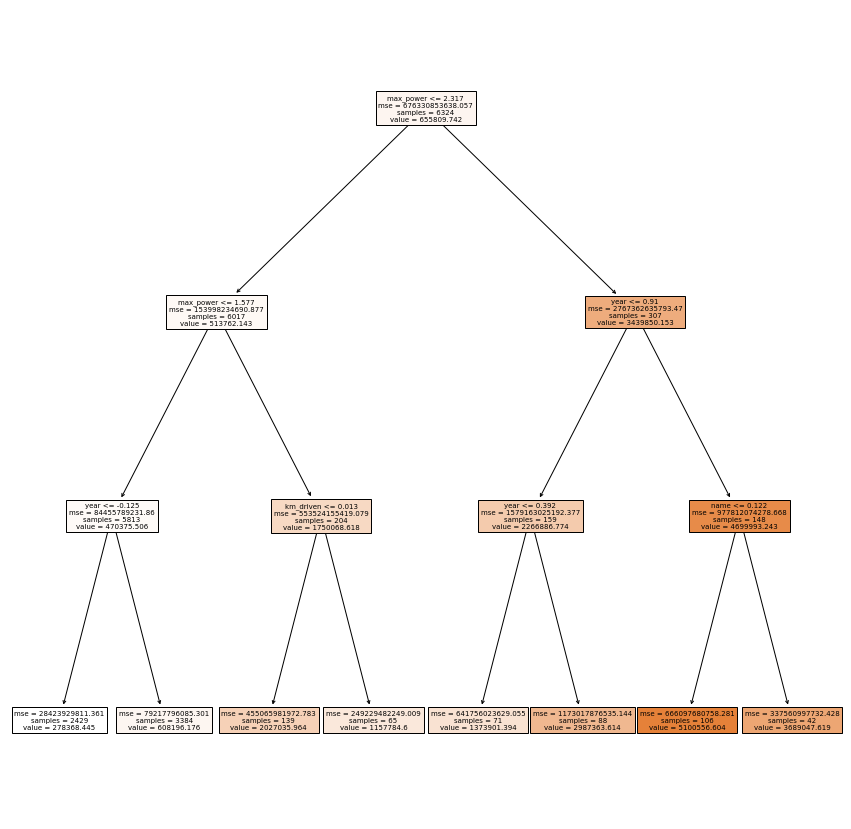

In [108]:
plt.figure(figsize=(15,15))
tree.plot_tree(reg2,feature_names=x.columns,
              class_names=None,
              filled = True)

Tuning the depth parameter to increase score and to get accurate depth-- As max number of feature is 15 we kepth depth upto a range of 7 for checking

In [109]:
from sklearn.model_selection import GridSearchCV
mod = GridSearchCV(reg2,param_grid={'max_depth':[2,3,4,5,6,7]})
mod.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=3),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7]})

In [110]:
mod.best_estimator_

DecisionTreeRegressor(max_depth=6)

The best result is obtained in a depth 7 . Above this depth also one can obtain better result but it may overfit

In [111]:
mod.best_score_

0.9370567980467814

In [112]:
p=mod.predict(xtest)
mae2 = mean_absolute_error(ytest,p)
mae2

119255.87455253962

In [113]:
mse2 = mean_squared_error(ytest,p)
mse2

48813625467.698425

In [114]:
rmse2 = mean_squared_error(ytest,p,squared=False)
rmse2

220938.05798842903

In [115]:
r2 = r2_score(ytest,p)
r2

0.9190703005833678

In [116]:
test_results_mae['Decision Tree Regression']=mae2
test_results_mse['Decision Tree Regression']=mse2
test_results_r2_score['Decision Tree Regression']=r2
test_result_score['Decision Tree Regression']=rmse2

Displaying the tree for the tuned parameter

[Text(942.4553571428572, 1528.875, 'max_power <= 2.317\nmse = 676330853638.057\nsamples = 6324\nvalue = 655809.742'),
 Text(517.5892857142858, 1325.025, 'max_power <= 1.577\nmse = 153998234690.877\nsamples = 6017\nvalue = 513762.143'),
 Text(283.42857142857144, 1121.175, 'year <= -0.125\nmse = 84455789231.86\nsamples = 5813\nvalue = 470375.506'),
 Text(141.71428571428572, 917.3249999999999, 'max_power <= 0.183\nmse = 28423929811.361\nsamples = 2429\nvalue = 278368.445'),
 Text(70.85714285714286, 713.475, 'year <= -0.902\nmse = 14356253708.182\nsamples = 1835\nvalue = 227853.94'),
 Text(35.42857142857143, 509.625, 'max_power <= -0.826\nmse = 6161683582.037\nsamples = 801\nvalue = 154208.527'),
 Text(17.714285714285715, 305.7750000000001, 'mileage <= -0.128\nmse = 1886849079.728\nsamples = 260\nvalue = 99464.881'),
 Text(8.857142857142858, 101.92499999999995, 'mse = 1284397497.781\nsamples = 140\nvalue = 77124.7'),
 Text(26.571428571428573, 101.92499999999995, 'mse = 1328136631.194\nsamp

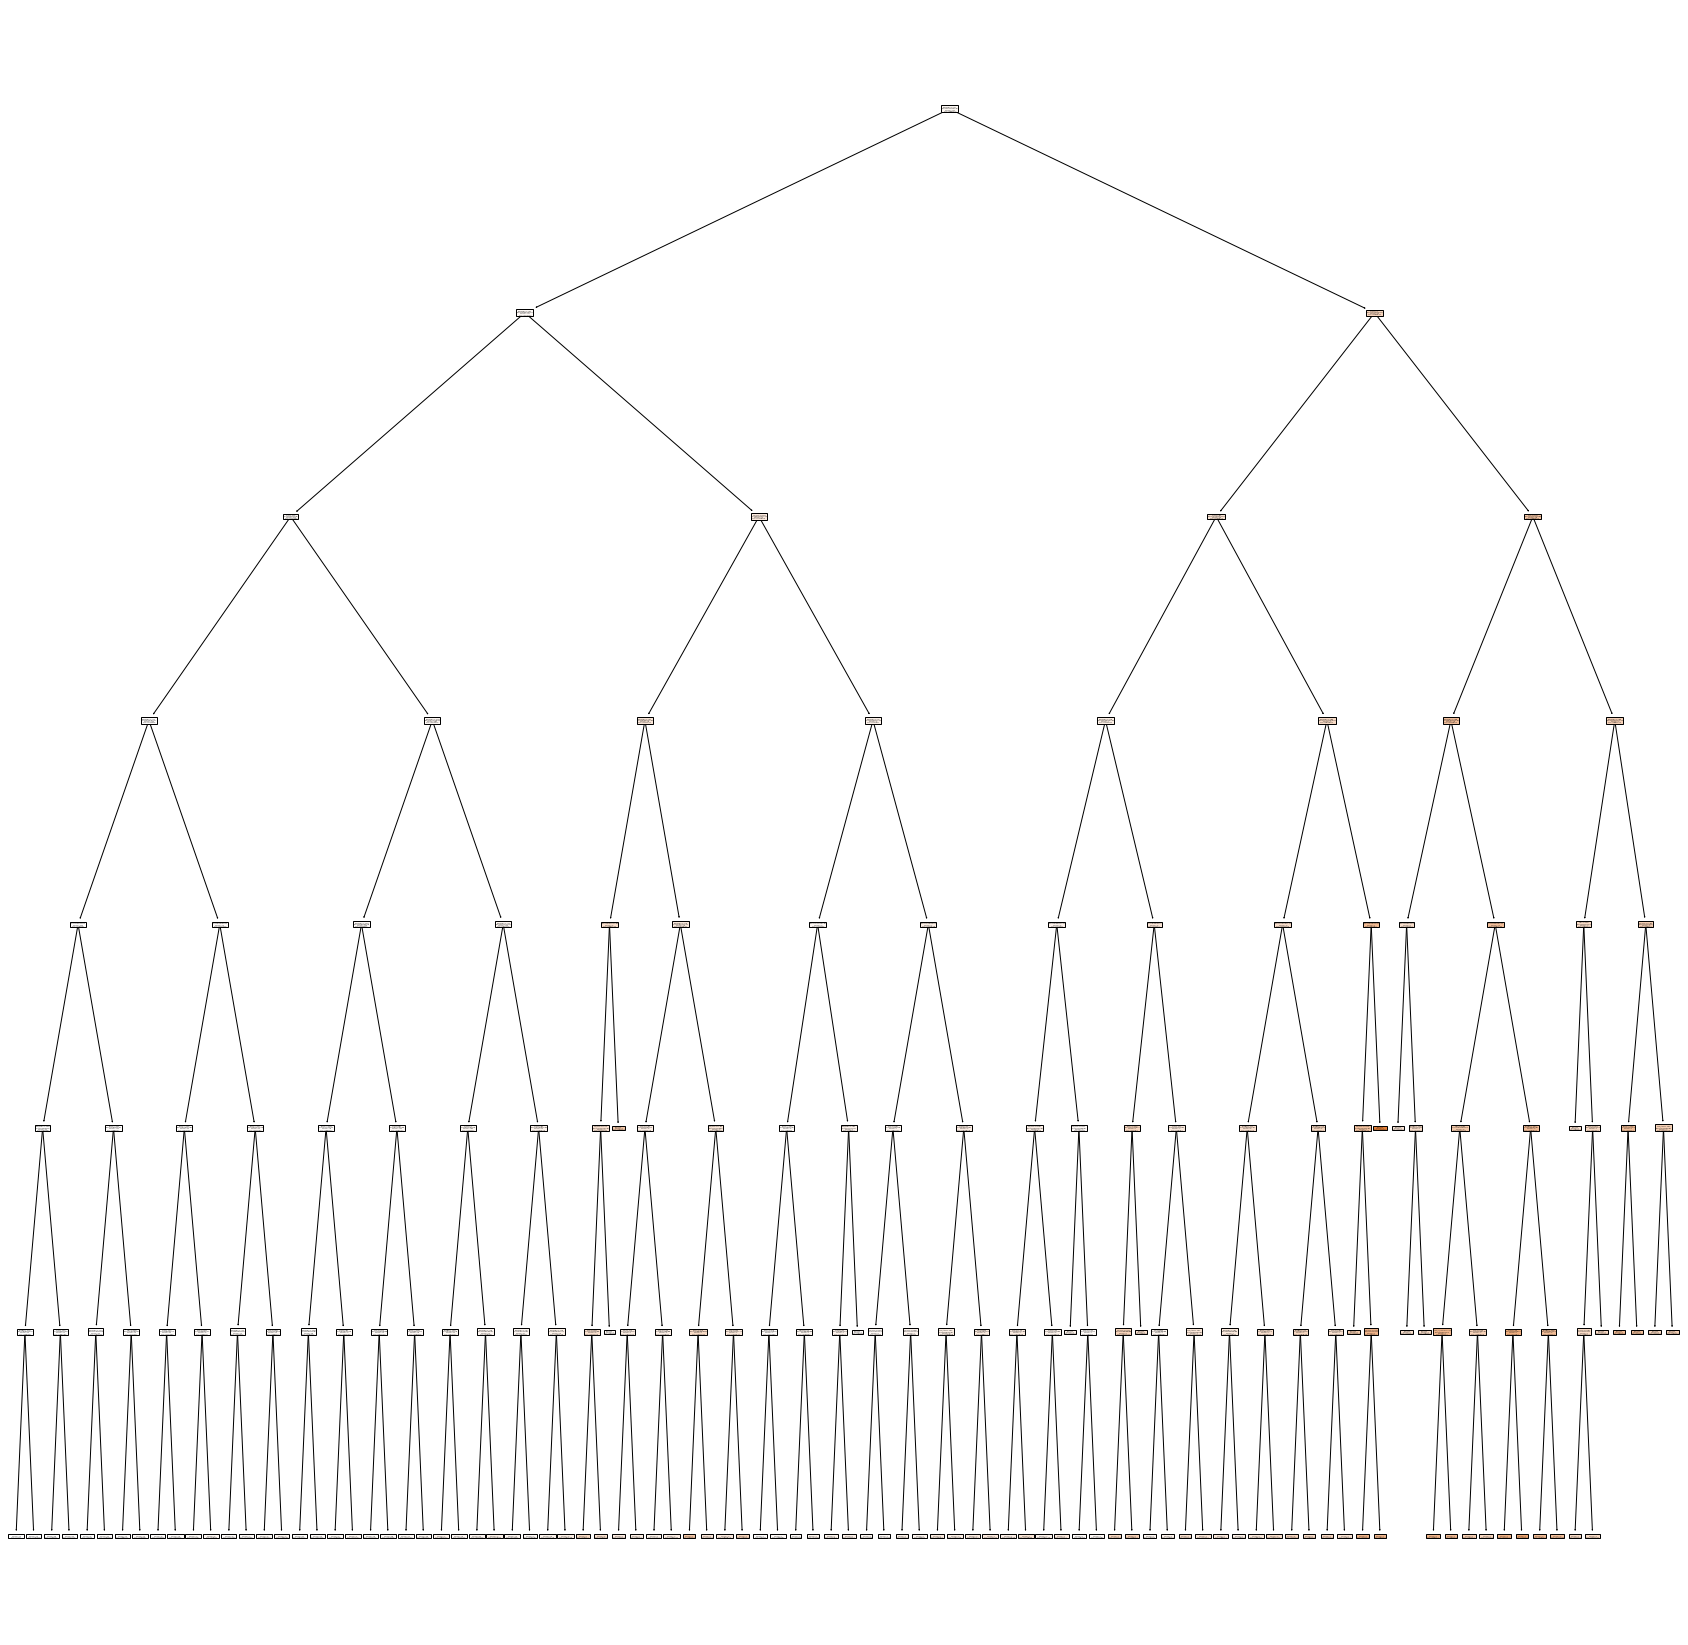

In [117]:
r = tree.DecisionTreeRegressor(max_depth=7)
r.fit(xtrain,ytrain)
r.score(xtest,ytest)
plt.figure(figsize=(30,30))
tree.plot_tree(r,feature_names=x.columns,
              class_names=None,
              filled = True)

Tree is quite big and unreadble

# Ensemble models

# Adaboost Regressor

In [118]:
from sklearn.ensemble import AdaBoostRegressor
reg3 = AdaBoostRegressor(n_estimators=2,random_state=400)
reg3.fit(xtrain,ytrain)
reg3.score(xtest,ytest)

0.7611696012318794

Tried using n_estimators of range lower as well as higher to get perfect range that gives best score--checked for 2 to 140 and in all the range found value 11 giving best score so chose that 

In [119]:
mod2 = GridSearchCV(reg3,param_grid={'n_estimators':np.arange(2,30)})
mod2.fit(xtrain,ytrain)

GridSearchCV(estimator=AdaBoostRegressor(n_estimators=2, random_state=400),
             param_grid={'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [120]:
mod2.best_estimator_

AdaBoostRegressor(n_estimators=11, random_state=400)

In [121]:
mod2.best_score_

0.8836346119727025

In [122]:
pr=mod2.predict(xtest)
mae3 = mean_absolute_error(ytest,pr)
mae3

191733.6080540976

In [123]:
mse3 = mean_squared_error(ytest,pr)
mse3

76750211115.53708

In [124]:
r3 = r2_score(ytest,pr)
r3

0.872753325403913

In [125]:
rmse3 = mean_squared_error(ytest,pr,squared=False)
rmse3

277038.28456647845

In [126]:
test_results_mae['Adaboost Regression']=mae3
test_results_mse['Adaboost Regression']=mse3
test_results_r2_score['Adaboost Regression']=r3
test_result_score['Adaboost Regression']=rmse3

In [127]:
reg3 = AdaBoostRegressor(n_estimators=11,random_state=400)
reg3.fit(xtrain,ytrain)
reg3.score(xtest,ytest)

0.872753325403913

In [128]:
reg3.feature_importances_

array([0.02813499, 0.10936367, 0.06721414, 0.        , 0.        ,
       0.        , 0.        , 0.01069103, 0.0101017 , 0.00834897,
       0.00861205, 0.75655841, 0.00097504, 0.        , 0.        ])

<AxesSubplot:>

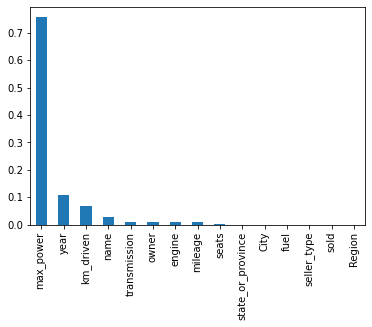

In [129]:
feature_imp=pd.Series(reg3.feature_importances_,index=x.columns)
feature_imp.sort_values(ascending=False).plot(kind='bar')

This shows how adaboost gives your features importance to target

# Gradient Boosting Regressor

In [130]:
from sklearn.ensemble import GradientBoostingRegressor
reg4 = GradientBoostingRegressor(n_estimators=4,random_state=25)
reg4.fit(xtrain,ytrain)
reg4.score(xtest,ytest)

0.4854516696966147

Checked for best score with n_estimators on different range of one steps as weel from 2 to 30 also checked with steps of 10 for 10 to 140 and observed that we get best score at value 150

In [131]:
mod3 = GridSearchCV(reg4,param_grid={'n_estimators':np.arange(10,160,10)})
mod3.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingRegressor(n_estimators=4,
                                                 random_state=25),
             param_grid={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150])})

In [132]:
mod3.best_estimator_

GradientBoostingRegressor(n_estimators=150, random_state=25)

In [133]:
mod3.best_score_

0.9613985205398341

In [134]:
pr=mod3.predict(xtest)
mae4 = mean_absolute_error(ytest,pr)
mae4

79311.9524090764

In [135]:
mse4 = mean_squared_error(ytest,pr)
mse4

21531132515.683826

In [136]:
rmse4 = mean_squared_error(ytest,pr,squared=False)
rmse4

146734.9055803827

In [137]:
r4 = r2_score(ytest,pr)
r4

0.9643028341800376

In [138]:
test_results_mae['Gradient Boosting Regression']=mae4
test_results_mse['Gradient Boosting Regression']=mse4
test_results_r2_score['Gradient Boosting Regression']=r4
test_result_score['Gradient Boosting Regression']=rmse4

In [139]:
reg4 = GradientBoostingRegressor(n_estimators=150,random_state=25)
reg4.fit(xtrain,ytrain)
reg4.score(xtest,ytest)

0.9643028341800376

In [140]:
reg4.feature_importances_

array([1.34270801e-02, 1.88773272e-01, 1.97531985e-02, 1.40579910e-04,
       4.29563910e-04, 2.75092343e-03, 7.10186221e-03, 1.43203488e-02,
       2.32951044e-04, 8.15576672e-03, 1.95583700e-02, 7.22549709e-01,
       2.58303427e-03, 0.00000000e+00, 2.23340725e-04])

In [141]:
feature_imp=pd.Series(reg4.feature_importances_,index=x.columns)

<AxesSubplot:>

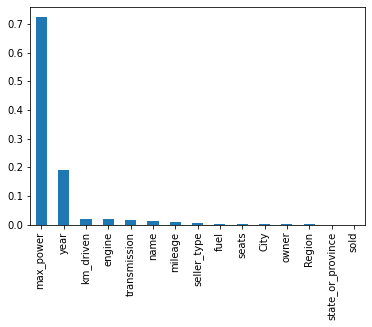

In [142]:
feature_imp.sort_values(ascending=False).plot(kind='bar')

We can observe how features affect the model on predicting target 

# Random Forest Regressor

In [143]:
from sklearn.ensemble import RandomForestRegressor
reg5=RandomForestRegressor(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)
reg5.fit(xtrain,ytrain)
reg5.score(xtest,ytest)

0.9720895046951219

In [156]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_reg_model.pkl', 'wb')

# dump information to that file
pickle.dump(reg5, file)

out of bag score

In [144]:
reg5.oob_score_

0.9660257255399624

In [145]:
for w in range(10,300,20):
    clf=RandomForestRegressor(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    clf.fit(xtrain,ytrain)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

C:\Users\psarana\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


For n_estimators = 10
OOB score is 0.9363778092403325
************************
For n_estimators = 30
OOB score is 0.9676328272153917
************************
For n_estimators = 50
OOB score is 0.9672908314748463
************************
For n_estimators = 70
OOB score is 0.9662996836455091
************************
For n_estimators = 90
OOB score is 0.9665263115736863
************************
For n_estimators = 110
OOB score is 0.9668317231859691
************************
For n_estimators = 130
OOB score is 0.9671439165907829
************************
For n_estimators = 150
OOB score is 0.9674806923337553
************************
For n_estimators = 170
OOB score is 0.967128414383111
************************
For n_estimators = 190
OOB score is 0.9672340226439919
************************
For n_estimators = 210
OOB score is 0.9673094882880794
************************
For n_estimators = 230
OOB score is 0.9674201244241534
************************
For n_estimators = 250
OOB score is 0.96742753

In [146]:
mod4=RandomForestRegressor(n_estimators=150,oob_score=True,n_jobs=-1,random_state=400)
mod4.fit(xtrain,ytrain)
mod4.oob_score_

0.9674806923337553

In [147]:
pr1=mod4.predict(xtest)
mae5 = mean_absolute_error(ytest,pr1)
mae5

67303.68260088695

In [148]:
mse5 = mean_squared_error(ytest,pr1)
mse5

16790921805.538332

In [149]:
rmse5 = mean_squared_error(ytest,pr1,squared=False)
rmse5

129579.78934053848

In [150]:
r5 = r2_score(ytest,pr1)
r5

0.9721617838947527

In [151]:
test_results_mae['Random Forest Regression']=mae5
test_results_mse['Random Forest Regression']=mse5
test_results_r2_score['Random Forest Regression']=r5
test_result_score['Random Forest Regression']=rmse5

In [152]:
mod4.feature_importances_

array([1.94248008e-02, 1.93012574e-01, 1.63422061e-02, 1.99344147e-03,
       2.83873171e-03, 2.17498223e-03, 3.42261661e-03, 2.04053761e-03,
       9.44377251e-04, 1.46928214e-02, 1.02010004e-02, 7.28089057e-01,
       3.71473025e-03, 2.90233838e-04, 8.17888980e-04])

In [153]:
imp_feat=pd.Series(mod4.feature_importances_,index=x.columns.tolist())

<AxesSubplot:>

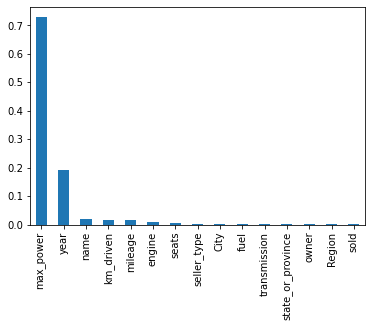

In [154]:
imp_feat.sort_values(ascending=False).plot(kind='bar')

We can observe how features affect the model in predicting selling price

# XGBoost Regressor

In [155]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
reg6=XGBRegressor(n_estimators=80,random_state=400)
reg6.fit(xtrain,ytrain)
reg6.score(xtest,ytest)

In [ ]:
mod=GridSearchCV(reg6,param_grid={'n_estimators':[60,80,100,120,140,160]})
mod.fit(xtrain,ytrain)

In [ ]:
mod.best_estimator_

In [ ]:
pr2=mod.predict(xtest)
mae6 = mean_absolute_error(ytest,pr2)
mae6

In [ ]:
mse6 = mean_squared_error(ytest,pr2)
mse6

In [ ]:
rmse6 = mean_squared_error(ytest,pr2,squared=False)
rmse6

In [ ]:
r6 = r2_score(ytest,pr2)
r6

In [ ]:
test_results_mae['XGBoost Regression']=mae6
test_results_mse['XGBoost Regression']=mse6
test_results_r2_score['XGBoost Regression']=r6
test_result_score['XGBoost Regression']=rmse6

In [ ]:
mod.best_score_

# Clustering

Choosing values which are numerical and not categorical

In [ ]:
data = xtrain[['max_power','km_driven','mileage','engine']]

In [ ]:
import sklearn.cluster as cluster

In [ ]:
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
kmeans=kmeans.fit(data)

In [ ]:
kmeans.labels_

In [ ]:
kmeans.cluster_centers_

In [ ]:
from scipy.spatial.distance import cdist
K=range(1,20)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(data)
    wss.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), 
                                      axis=1)) / data.shape[0])

In [ ]:
plt.plot(K, wss, 'bx')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [ ]:
import sklearn.metrics as metrics
labels=cluster.KMeans(n_clusters=8,random_state=200).fit(data).labels_

In [ ]:
metrics.silhouette_score(data,labels,metric="euclidean",sample_size=10000,random_state=200)

In [ ]:
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(data).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(data,labels,metric="euclidean",
                                 sample_size=1000,random_state=200)))

In [ ]:
kmeans = cluster.KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(data)

In [ ]:
X = pd.DataFrame(data,columns=data.columns)
X.head()

In [ ]:
y_kmeans = pd.Series(y_kmeans)

In [ ]:
finaldf= pd.concat([X, y_kmeans], axis=1)
finaldf.head()

In [ ]:
finaldf.head()

In [ ]:
finaldf.columns = ['max_power','km_driven','mileage','engine','label']
finaldf.head()

In [ ]:
finaldf['label'].unique()

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(finaldf['mileage'],finaldf['engine'],c=finaldf['label'])

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(finaldf['mileage'],finaldf['max_power'],c=finaldf['label'])

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(finaldf['mileage'],finaldf['km_driven'],c=finaldf['label'])

# Deep Neural Networks

In [ ]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [ ]:
import tensorflow as tf
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
normalizer.adapt(np.array(xtrain))

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

15 weghts 1 bias--16

Dense layer = 1 node = 16 output 64 nodes = 1024 params

Dense6 layer = 1 node = 65 output 64 nodes = 64*65 params

Dense7 layer = 1 node = 65 params

Trainable = all the weights and biases

Non-trainable = 10 nodes, 15 x (norm and output layers)

In [ ]:
history = dnn_model.fit(
    xtrain,
    ytrain,
    validation_split=0.2,
    verbose=1, epochs=10)

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

In [ ]:
plot_loss(history)

In [ ]:
test_results_mae['DNN model'] = dnn_model.evaluate(
    xtest,
    ytest, verbose=1)

In [ ]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss=tf.keras.losses.mean_squared_error,
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [ ]:
dnn_model2 = build_and_compile_model(normalizer)
history = dnn_model2.fit(
    xtrain,
    ytrain,
    validation_split=0.2,
    verbose=1, epochs=10)

In [ ]:
test_results_mse['DNN model'] = dnn_model2.evaluate(
    xtest,
    ytest, verbose=1)

# Model Comparison

In [ ]:
results = pd.DataFrame([test_results_mae,test_results_mse,test_results_r2_score,test_result_score],index=['mae','mse','r2_score','rmse'])
results

From the observation we can see that Random forest regressor got lowest mean squared error,lowest root mean squared errorand highest r2_score . As these three metrics are lower in RandomForest, It is considered as the best model among the compared ones.

# Metric

The MAE you get is in the same unit as the output variable.

It is most Robust to outliers.

The graph of MSE is differentiable, so you can easily use it as a loss function.

As the value obtained from MSE is too big rott mean squared error value is used to bring to normal scale.

All the above talks about losses, R2_score tells the performance of your model is present.

These  are the most common and best metrics used for regression model comparisons.

One can use all these metrics combination to come to a strong conclusion.

# Issues and Concerns 

In [ ]:
car.head()

In [ ]:
car.isnull().sum()

As we can see there are no missing values in the dataset. 

In [ ]:
cr.describe()

In [ ]:
plt.hist(cr.km_driven)

This is also right skewed

In [ ]:
plt.hist(cr.mileage)

In [ ]:
plt.hist(cr.engine)

This is a little right skewed

In [ ]:
plt.hist(cr.max_power)

It is right skewed

There is skewness in some features. It can be overcome by log transformation.

There were outliers on original dataset which was treated in EDA. The skewness is not that prominent that it will create problems in model training.

The dataset is a clean and relatively a good one there are no issues and much concerns.